In [1]:
import matplotlib.pyplot as plt
import uproot
import numpy as np
import pandas as pd

from pathlib import Path
from sklearn.model_selection import train_test_split




#path = "/nfs/dust/belle2/user/axelheim/MC_studies/my6modes/"
#root_path = path + "rootfiles/noSim_noReco/"
#file_pi = uproot.open((root_path + "pi_nTuples_mode0.root"))

#file_raw = uproot.open(root_path + "mode0_17_events.root")

In [6]:
file = uproot.open("/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/recreateGiannasPlot/merged_100k_DXtagDstl.root:variables")

In [7]:
file.keys()

['__experiment__',
 '__run__',
 '__event__',
 '__candidate__',
 '__ncandidates__',
 '__weight__',
 'm2RecoilSignalSide',
 'foxWolframR2_maskedNaN',
 'foxWolframR2',
 'extraInfo__boFEIProbabilityRank__bc',
 'nTracks',
 'BeamE',
 'BeamPx',
 'BeamPy',
 'BeamPz',
 'BeamcmsE',
 'BeamcmsPx',
 'BeamcmsPy',
 'BeamcmsPz',
 'genUp4S_PDG_0',
 'genUp4S_charge_0',
 'genUp4S_mdstIndex_0',
 'genUp4S_genParticleID_0',
 'genUp4S_E_0',
 'genUp4S_Px_0',
 'genUp4S_Py_0',
 'genUp4S_Pz_0',
 'genUp4S_P_0',
 'genUp4S_cmE_0',
 'genUp4S_cmPx_0',
 'genUp4S_cmPy_0',
 'genUp4S_cmPz_0',
 'genUp4S_cmP_0',
 'genUp4S_PDG_0_0',
 'genUp4S_mdstIndex_0_0',
 'genUp4S_genParticleID_0_0',
 'genUp4S_PDG_0_0_0',
 'genUp4S_mdstIndex_0_0_0',
 'genUp4S_genParticleID_0_0_0',
 'genUp4S_PDG_0_0_1',
 'genUp4S_mdstIndex_0_0_1',
 'genUp4S_genParticleID_0_0_1',
 'genUp4S_PDG_0_1',
 'genUp4S_mdstIndex_0_1',
 'genUp4S_genParticleID_0_1',
 'genUp4S_PDG_0_2',
 'genUp4S_mdstIndex_0_2',
 'genUp4S_genParticleID_0_2',
 'genUp4S_PDG_1',
 'genUp4

In [8]:
df = file.arrays(library="pd")

In [9]:
df.to_csv("/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/recreateGiannasPlot/DXtagDstl_df.csv")

### this step is necessary because the uproot works only with my conda environment but on my localhost jupyterhub server the plots make the kernel die

In [2]:
df = pd.read_csv("/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/recreateGiannasPlot/DXtagDstl_df.csv")

## print combinations of decay particles (mcDaughter(PDG))

In [3]:
#combis = pd.DataFrame({'count' : df.groupby( ["__event__","genUp4S_PDG_1_2","genUp4S_PDG_0_2"] ).size()}).reset_index()
combis = pd.DataFrame({'count' : df.groupby( ["genUp4S_PDG_1_2","genUp4S_PDG_0_2"] ).size()}).reset_index()



with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(combis.sort_values("count"))



      genUp4S_PDG_1_2  genUp4S_PDG_0_2  count
0            -10321.0           -999.0      1
1414             16.0             14.0      1
1426             16.0            411.0      1
1429             16.0            423.0      1
1430             16.0            431.0      1
1431             16.0            433.0      1
1432             16.0           2114.0      1
1433             16.0           2212.0      1
1434             16.0           2214.0      1
1436             22.0          -3222.0      1
1437             22.0          -3212.0      1
1438             22.0          -3112.0      1
1439             22.0          -2214.0      1
1440             22.0          -2212.0      1
1442             22.0          -2112.0      1
1445             22.0           -431.0      1
1481             22.0            423.0      1
1483             22.0            433.0      1
1485             22.0           2112.0      1
1488             22.0           2214.0      1
1489             22.0           22

In [4]:
#combis = pd.DataFrame({'count' : df.groupby( ["__event__","genUp4S_PDG_1_2","genUp4S_PDG_0_2"] ).size()}).reset_index()
Bmesons = pd.DataFrame({'count' : df.groupby( ["genUp4S_PDG_1","genUp4S_PDG_0","dau1_mdstIndex"] ).size()}).reset_index()



with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(Bmesons.sort_values("count"))



   genUp4S_PDG_1  genUp4S_PDG_0  dau1_mdstIndex  count
0         -511.0         -511.0             0.0  15399
3          511.0          511.0             0.0  15575
2          511.0         -511.0             0.0  68419
1         -511.0          511.0             0.0  68875


In [47]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df["dau1_dau1_mothermdstIndex"].value_counts())


 2.0      57038
 1.0      57009
 4.0       5051
 3.0       4804
 10.0      3414
 9.0       3408
 8.0       3089
 11.0      3005
 7.0       2782
 12.0      2474
 6.0       2409
 13.0      2065
 5.0       1928
 14.0      1539
-999.0     1519
 15.0      1271
 16.0      1022
 18.0       916
 17.0       913
 20.0       876
 19.0       871
 21.0       860
 22.0       816
 23.0       763
 24.0       739
 25.0       689
 26.0       625
 27.0       580
 28.0       462
 29.0       461
 30.0       418
 31.0       336
 32.0       297
 33.0       293
 34.0       230
 35.0       205
 36.0       200
 37.0       193
 38.0       169
 39.0       139
 40.0       135
 42.0       128
 41.0       122
 43.0       117
 46.0       113
 45.0       112
 44.0       105
 48.0        98
 49.0        97
 47.0        97
 51.0        96
 50.0        91
 55.0        77
 54.0        73
 57.0        69
 52.0        67
 53.0        62
 58.0        56
 61.0        49
 60.0        48
 59.0        46
 56.0        45
 65.0   

## plots

[Text(0.5, 1.0, 'Unaltered m2RecoilSignalSide')]

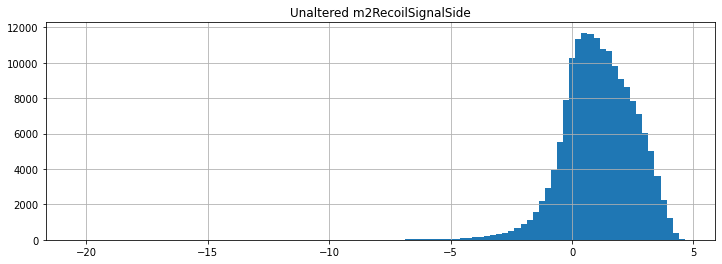

In [3]:
hist = df.hist("m2RecoilSignalSide", bins=100, figsize=(12,4))
#hist = df.hist('correct', bins=100, by='K', figsize=(12,4))

#xlim = (0, 1.0)
#ylim = (0, 1200)
#xlabel="percentage of correctly particles per event"
#ylabel="events"

title="Unaltered m2RecoilSignalSide"

# Setting the values for all axes.
#plt.setp(hist, xlim=xlim, xlabel=xlabel, ylabel=ylabel, title=title)
plt.setp(hist, title=title)



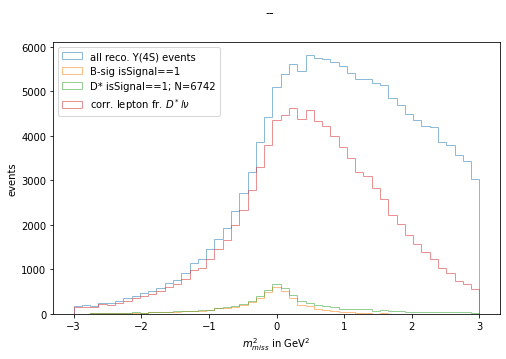

In [23]:
bins = np.linspace(-3, 3, 50)
fig, ax = plt.subplots()
fig.suptitle('--')
fig.set_size_inches(8, 5)

ax.set_xlabel(r'$m_{miss}^2$ in GeV$^2$')
ax.set_ylabel("events")


num_corrEvts = df[(df["Dst_isSignal"] == 1)].shape[0]

ax.hist(df.m2RecoilSignalSide, bins, alpha=0.5, label='all reco. Y(4S) events',histtype='step')
ax.hist(df[(df["dau1_isSignal"] == 1)].m2RecoilSignalSide, bins, alpha=0.5, label="B-sig isSignal==1",histtype='step')
ax.hist(df[(df["Dst_isSignal"] == 1)].m2RecoilSignalSide, bins, alpha=0.5, label=('D* isSignal==1; N=%i' %num_corrEvts),histtype='step')

correct_lep = df[(df["lep_motherPDG"].abs() == 511) & ((df["lep_mcPDG"].abs() == 13) | (df["lep_mcPDG"].abs() == 11))]
ax.hist(correct_lep.m2RecoilSignalSide, bins, alpha=0.5, label=(r'corr. lepton fr. $D^*l\nu$'),histtype='step')



ax.legend(loc='upper left')


plt.savefig('mmSquared_isSignal_GiannasScript_beforeOfflineCuts.pdf')

In [6]:
cut_df = df
print(cut_df.shape[0])
cut_df = cut_df[cut_df.dau0_Mbc > 5.26] # cut on B_tag M_bc
print(cut_df.shape[0])
cut_df = cut_df[(cut_df.dau0_deltaE < 0.2) & (cut_df.dau0_deltaE > -0.2)] # cut on B_tag deltaE
print(cut_df.shape[0])
cut_df = cut_df[cut_df.dau0_dau0_sigProb > 0.001] # cut on H_c sigProb
print(cut_df.shape[0])
cut_df = cut_df[cut_df.foxWolframR2 < 0.3] # cut on event
print(cut_df.shape[0])
cut_df = cut_df[(cut_df.Dst_pt < 2.4) & (cut_df.lep_pt > 1.0)] # cut on l and D* pt

168268
20006
20006
20006
18970


In [6]:
print("precut correctly reconstr. D* events",df[(df["Dst_isSignal"] == 1)].shape[0])

precut correctly reconstr. D* events 6742


In [7]:
print("after cut correctly reconstr. D* events",cut_df[(cut_df["Dst_isSignal"] == 1)].shape[0])

after cut correctly reconstr. D* events 2528


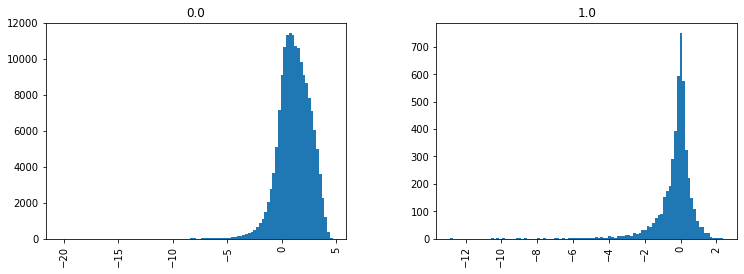

In [8]:
hist = df.hist("m2RecoilSignalSide", bins=100, figsize=(12,4), by="dau1_isSignal") # dau1 = B-sig; dau1_isSignal = acceptMissingNeutrino

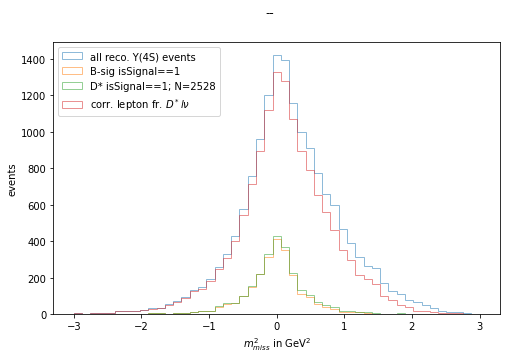

In [24]:
bins = np.linspace(-3, 3, 50)
fig, ax = plt.subplots()
fig.suptitle('--')
fig.set_size_inches(8, 5)

ax.set_xlabel(r'$m_{miss}^2$ in GeV$^2$')
ax.set_ylabel("events")

num_corrEvts = cut_df[(cut_df["Dst_isSignal"] == 1)].shape[0]

ax.hist(cut_df.m2RecoilSignalSide, bins, alpha=0.5, label='all reco. Y(4S) events',histtype='step')
ax.hist(cut_df[(cut_df["dau1_isSignal"] == 1)].m2RecoilSignalSide, bins, alpha=0.5, label='B-sig isSignal==1',histtype='step')
ax.hist(cut_df[(cut_df["Dst_isSignal"] == 1)].m2RecoilSignalSide, bins, alpha=0.5, label=('D* isSignal==1; N=%i' %num_corrEvts),histtype='step')


correct_lep = cut_df[(cut_df["lep_motherPDG"].abs() == 511) & ((cut_df["lep_mcPDG"].abs() == 13) | (cut_df["lep_mcPDG"].abs() == 11))]
ax.hist(correct_lep.m2RecoilSignalSide, bins, alpha=0.5,label=(r'corr. lepton fr. $D^*l\nu$'),histtype='step')

#correct_Dst = cut_df[(cut_df["dau1_dau0_mcPDG"].abs() == 511) & ((cut_df["lep_mcPDG"].abs() == 13) | (cut_df["lep_mcPDG"].abs() == 11))]
#ax.hist(correct_lep.m2RecoilSignalSide, bins, alpha=0.5, label="correct lepton",histtype='step')



#lep_motherPDG
ax.legend(loc='upper left')

plt.savefig('mmSquared_isSignal_GiannasScript_afterOfflineCuts.pdf')

In [5]:
cut_df["genUp4S_PDG_1_2"].abs().value_counts()

NameError: name 'cut_df' is not defined

In [8]:
cut_df["dau1_mcPDG"].abs().value_counts()

300553.0    8720
0.0         3821
511.0       3093
Name: dau1_mcPDG, dtype: int64

In [10]:
cut_df["lep_motherPDG"].abs().value_counts()

511.0        14236
421.0          262
411.0          215
213.0          211
431.0          162
113.0          136
15.0            78
20213.0         59
0.0             52
443.0           41
313.0           36
22.0            26
310.0           23
323.0           21
211.0           17
223.0            9
9000221.0        8
4122.0           6
441.0            5
111.0            4
2114.0           4
321.0            4
2214.0           4
44.0             3
315.0            1
221.0            1
100113.0         1
225.0            1
3222.0           1
415.0            1
13.0             1
445.0            1
10411.0          1
3122.0           1
20413.0          1
9010221.0        1
Name: lep_motherPDG, dtype: int64

In [10]:
cut_df[(cut_df["lep_motherPDG"].abs() == 511) & ((cut_df["lep_mcPDG"].abs() == 13) | (cut_df["lep_mcPDG"].abs() == 11))]

,Unnamed: 0,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,m2RecoilSignalSide,foxWolframR2_maskedNaN,foxWolframR2,...,Dst_cmpy,Dst_cmpz,Dst_cmpt,Dst_mccmE,Dst_mccmp,Dst_mccmpx,Dst_mccmpy,Dst_mccmpz,Dst_DeltaM,Dst_isSignal
10,10,1003,0,2458124,0,1,1.0,0.673459,0.234991,0.234991,...,-0.425754,0.523998,0.931081,11.003155,3.028028,0.456500,-0.000000,2.993420,0.142930,0.0
11,11,1003,0,2458225,0,1,1.0,0.227446,0.188024,0.188024,...,-0.724654,-0.874231,0.913730,2.197086,0.886710,-0.458667,-0.723845,-0.227877,0.146977,0.0
22,22,1003,0,2459817,0,1,1.0,0.695042,0.298878,0.298878,...,0.414063,-1.080745,0.415100,11.006012,3.038425,0.456618,-0.000000,3.003919,0.149403,0.0
23,23,1003,0,2459976,0,1,1.0,0.247660,0.064750,0.064750,...,0.492922,-0.069597,0.666662,11.011558,3.033203,0.456849,-0.000000,2.998601,0.159096,0.0
31,31,1003,0,2461040,0,1,1.0,0.699016,0.094285,0.094285,...,1.407819,0.977486,1.448759,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.148811,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168206,168206,1003,0,21555370,0,1,1.0,0.476303,0.156842,0.156842,...,0.257334,0.584665,1.240098,10.997043,3.028959,0.456246,-0.000000,2.994400,0.159446,0.0
168225,168225,1003,0,21558464,0,1,1.0,0.461880,0.197091,0.197091,...,-0.848451,-0.199755,1.196467,11.006563,3.034626,0.456641,-0.000000,3.000073,0.148370,0.0
168227,168227,1003,0,21558815,0,1,1.0,0.087358,0.044203,0.044203,...,-0.220334,-0.657388,0.328553,11.014566,3.030484,0.456973,-0.000000,2.995832,0.148215,0.0
168236,168236,1003,0,21560183,0,1,1.0,0.338744,0.090489,0.090489,...,-0.434985,0.236847,1.124221,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.147744,0.0


In [13]:
cut_df["lep_motherPDG"].value_counts() 

 511.0        7138
-511.0        7098
-421.0         142
 113.0         136
 421.0         120
-213.0         110
 411.0         108
-411.0         107
 213.0         101
-431.0          92
 431.0          70
 0.0            52
 443.0          41
-15.0           39
 15.0           39
 20213.0        32
-20213.0        27
 22.0           26
 310.0          23
 313.0          20
-313.0          16
 323.0          12
-211.0          10
-323.0           9
 223.0           9
 9000221.0       8
 211.0           7
 441.0           5
-2214.0          4
 111.0           4
 4122.0          3
-44.0            3
-4122.0          3
-2114.0          3
-321.0           2
 321.0           2
 100113.0        1
-20413.0         1
 13.0            1
-3122.0          1
 9010221.0       1
 221.0           1
 415.0           1
 315.0           1
 225.0           1
 2114.0          1
-3222.0          1
 445.0           1
 10411.0         1
Name: lep_motherPDG, dtype: int64

In [9]:
cut_df["lep_mcPDG"].value_counts() 

 13.0      3938
-13.0      3858
-11.0      3140
 11.0      3036
-211.0      683
 211.0      645
-321.0      131
 321.0      113
 0.0         52
-2212.0      26
 2212.0      12
Name: lep_mcPDG, dtype: int64

In [15]:
for key in cut_df.keys():
    print(key)

Unnamed: 0
__experiment__
__run__
__event__
__candidate__
__ncandidates__
__weight__
m2RecoilSignalSide
foxWolframR2_maskedNaN
foxWolframR2
extraInfo__boFEIProbabilityRank__bc
nTracks
BeamE
BeamPx
BeamPy
BeamPz
BeamcmsE
BeamcmsPx
BeamcmsPy
BeamcmsPz
genUp4S_PDG_0
genUp4S_charge_0
genUp4S_mdstIndex_0
genUp4S_genParticleID_0
genUp4S_E_0
genUp4S_Px_0
genUp4S_Py_0
genUp4S_Pz_0
genUp4S_P_0
genUp4S_cmE_0
genUp4S_cmPx_0
genUp4S_cmPy_0
genUp4S_cmPz_0
genUp4S_cmP_0
genUp4S_PDG_0_0
genUp4S_mdstIndex_0_0
genUp4S_genParticleID_0_0
genUp4S_PDG_0_0_0
genUp4S_mdstIndex_0_0_0
genUp4S_genParticleID_0_0_0
genUp4S_PDG_0_0_1
genUp4S_mdstIndex_0_0_1
genUp4S_genParticleID_0_0_1
genUp4S_PDG_0_1
genUp4S_mdstIndex_0_1
genUp4S_genParticleID_0_1
genUp4S_PDG_0_2
genUp4S_mdstIndex_0_2
genUp4S_genParticleID_0_2
genUp4S_PDG_1
genUp4S_charge_1
genUp4S_mdstIndex_1
genUp4S_genParticleID_1
genUp4S_E_1
genUp4S_Px_1
genUp4S_Py_1
genUp4S_Pz_1
genUp4S_P_1
genUp4S_cmE_1
genUp4S_cmPx_1
genUp4S_cmPy_1
genUp4S_cmPz_1
genUp4S_cm

In [ ]:
print("rows:",cut_df.shape[0])
print("colums:",cut_df.shape[1])



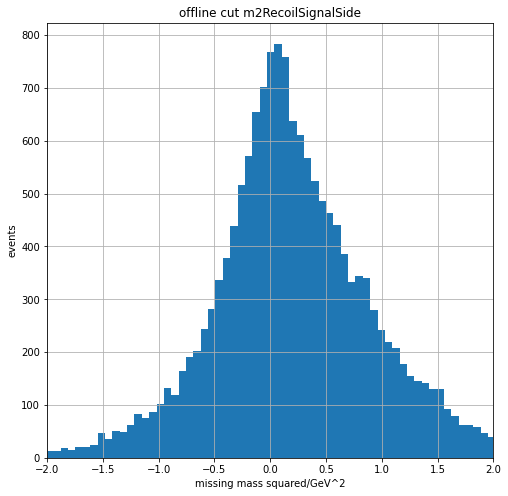

In [21]:
hist = cut_df.hist("m2RecoilSignalSide", bins=100, figsize=(8,8))

title="offline cut m2RecoilSignalSide"
xlim = (-2,2)

xlabel="missing mass squared/GeV^2"
ylabel="events"

plt.setp(hist, xlim=xlim, xlabel=xlabel, ylabel=ylabel, title=title)


#plt.savefig('GiannasPlotRecreated_MC14ri_a.pdf')

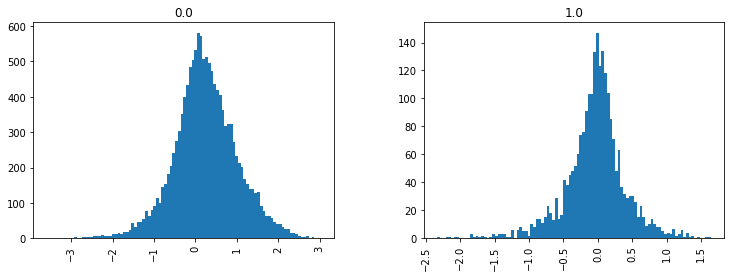

In [24]:
hist = cut_df.hist("m2RecoilSignalSide", bins=100, figsize=(12,4), by="dau1_isSignal") # dau1 = B-sig; dau1_isSignal = acceptMissingNeutrino

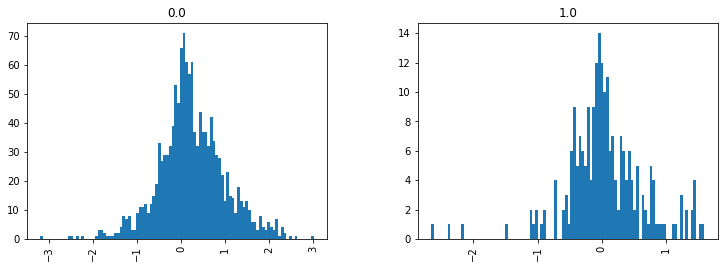

In [27]:
hist = cut_df.hist("m2RecoilSignalSide", bins=100, figsize=(12,4), by="dau0_dau0_isSignal")


In [6]:
cut_df

,Unnamed: 0,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,m2RecoilSignalSide,foxWolframR2_maskedNaN,foxWolframR2,...,Dst_cmpy,Dst_cmpz,Dst_cmpt,Dst_mccmE,Dst_mccmp,Dst_mccmpx,Dst_mccmpy,Dst_mccmpz,Dst_DeltaM,Dst_isSignal
10,10,1003,0,2458124,0,1,1.0,0.673459,0.234991,0.234991,...,-0.425754,0.523998,0.931081,11.003155,3.028028,0.456500,-0.000000,2.993420,0.142930,0.0
11,11,1003,0,2458225,0,1,1.0,0.227446,0.188024,0.188024,...,-0.724654,-0.874231,0.913730,2.197086,0.886710,-0.458667,-0.723845,-0.227877,0.146977,0.0
22,22,1003,0,2459817,0,1,1.0,0.695042,0.298878,0.298878,...,0.414063,-1.080745,0.415100,11.006012,3.038425,0.456618,-0.000000,3.003919,0.149403,0.0
23,23,1003,0,2459976,0,1,1.0,0.247660,0.064750,0.064750,...,0.492922,-0.069597,0.666662,11.011558,3.033203,0.456849,-0.000000,2.998601,0.159096,0.0
31,31,1003,0,2461040,0,1,1.0,0.699016,0.094285,0.094285,...,1.407819,0.977486,1.448759,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.148811,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168206,168206,1003,0,21555370,0,1,1.0,0.476303,0.156842,0.156842,...,0.257334,0.584665,1.240098,10.997043,3.028959,0.456246,-0.000000,2.994400,0.159446,0.0
168225,168225,1003,0,21558464,0,1,1.0,0.461880,0.197091,0.197091,...,-0.848451,-0.199755,1.196467,11.006563,3.034626,0.456641,-0.000000,3.000073,0.148370,0.0
168227,168227,1003,0,21558815,0,1,1.0,0.087358,0.044203,0.044203,...,-0.220334,-0.657388,0.328553,11.014566,3.030484,0.456973,-0.000000,2.995832,0.148215,0.0
168236,168236,1003,0,21560183,0,1,1.0,0.338744,0.090489,0.090489,...,-0.434985,0.236847,1.124221,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.147744,0.0
